In [40]:
import pandas as pd

# Load the CSV file
file_path = 'data.csv/financial-sentiment.csv'
financial_sentiment_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
financial_sentiment_data.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [42]:
# Display the full content of the CSV file to understand its structure and contents
financial_sentiment_data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


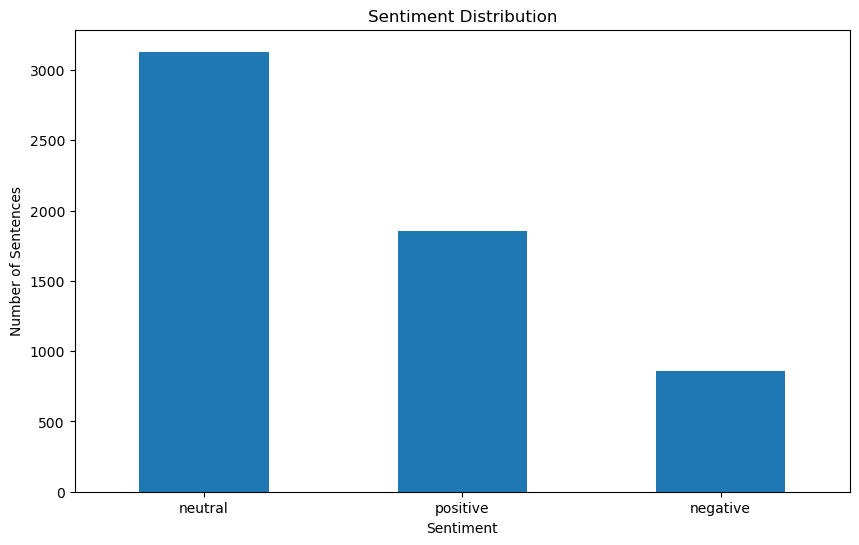

In [44]:
import matplotlib.pyplot as plt

# Calculate the distribution of sentiments
sentiment_distribution = financial_sentiment_data['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_distribution.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=0)
plt.show()

In [48]:
# Define the events and their dates
events = {
    'Event1': '2020-05-01',
    'Event2': '2020-09-15'
}

# Convert event dates to datetime
events = {event: pd.to_datetime(date) for event, date in events.items()}

# Define time window (e.g., 30 days before and after the event)
time_window = pd.Timedelta(days=30)

# Function to calculate sentiment distribution before and after an event
def sentiment_before_after(event_date, time_window):
    before_event = financial_sentiment_data_sorted[(financial_sentiment_data_sorted['Date'] >= event_date - time_window) &
                                                   (financial_sentiment_data_sorted['Date'] < event_date)]
    after_event = financial_sentiment_data_sorted[(financial_sentiment_data_sorted['Date'] > event_date) &
                                                  (financial_sentiment_data_sorted['Date'] <= event_date + time_window)]
    return before_event['Sentiment'].value_counts(), after_event['Sentiment'].value_counts()

# Analyze sentiment distribution for each event
event_sentiments = {}
for event, date in events.items():
    before_sentiment, after_sentiment = sentiment_before_after(date, time_window)
    event_sentiments[event] = {'Before': before_sentiment, 'After': after_sentiment}

event_sentiments


{'Event1': {'Before': Sentiment
  neutral     270
  positive    170
  negative     66
  Name: count, dtype: int64,
  'After': Sentiment
  neutral     269
  positive    135
  negative     77
  Name: count, dtype: int64},
 'Event2': {'Before': Sentiment
  neutral     254
  positive    143
  negative     81
  Name: count, dtype: int64,
  'After': Sentiment
  neutral     254
  positive    175
  negative     78
  Name: count, dtype: int64}}

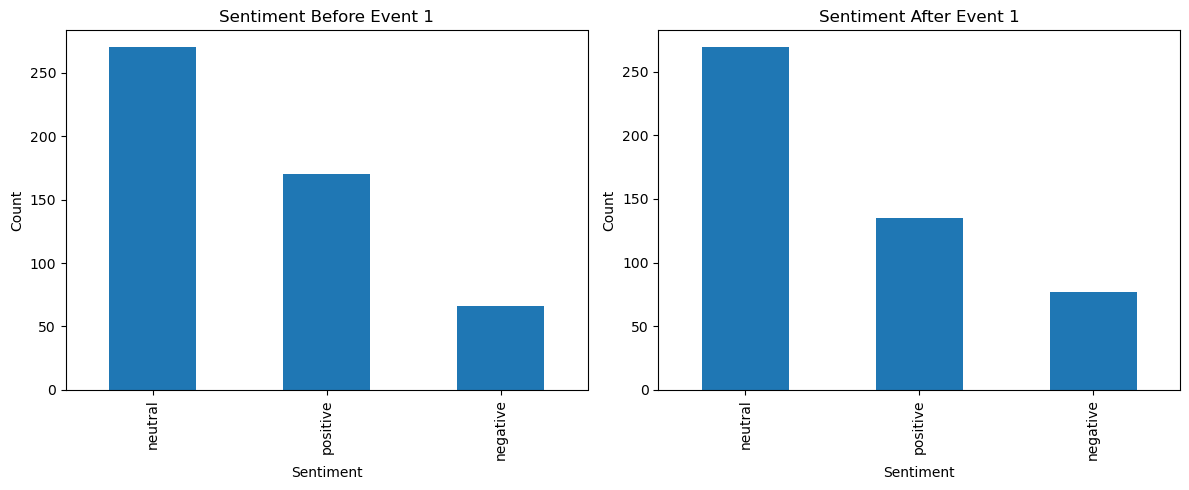

In [50]:
# Plot sentiment distribution for Event 1
plt.figure(figsize=(12, 5))

# Before Event 1
plt.subplot(1, 2, 1)
event1_before = event_sentiments['Event1']['Before']
event1_before.plot(kind='bar')
plt.title('Sentiment Before Event 1')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# After Event 1
plt.subplot(1, 2, 2)
event1_after = event_sentiments['Event1']['After']
event1_after.plot(kind='bar')
plt.title('Sentiment After Event 1')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


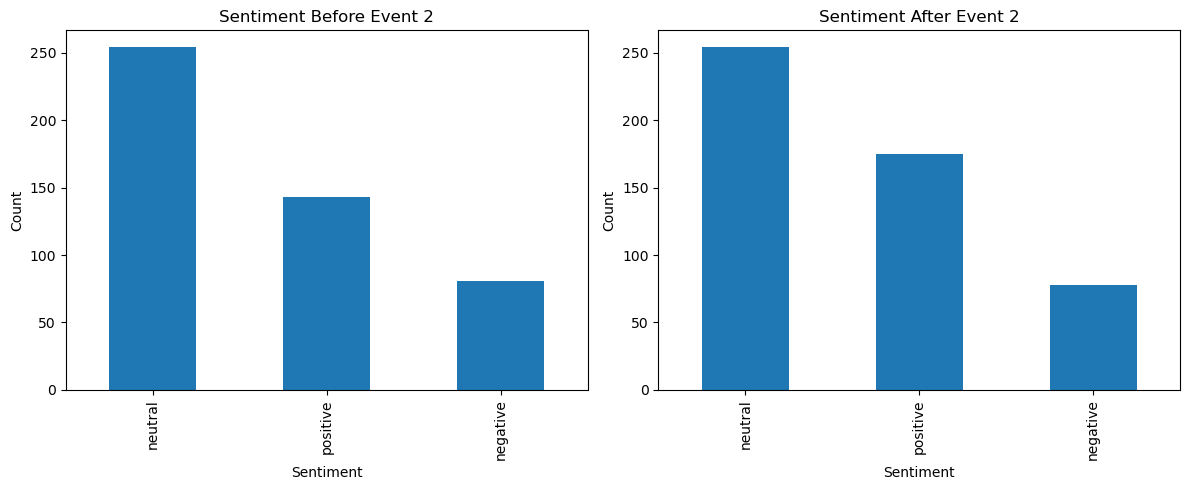

In [52]:
# Plot sentiment distribution for Event 2
plt.figure(figsize=(12, 5))

# Before Event 2
plt.subplot(1, 2, 1)
event2_before = event_sentiments['Event2']['Before']
event2_before.plot(kind='bar')
plt.title('Sentiment Before Event 2')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# After Event 2
plt.subplot(1, 2, 2)
event2_after = event_sentiments['Event2']['After']
event2_after.plot(kind='bar')
plt.title('Sentiment After Event 2')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [54]:
# Classify sentiments into bullish, bearish, and neutral
financial_sentiment_data_sorted['Market Sentiment'] = financial_sentiment_data_sorted['Sentiment'].apply(
    lambda x: 'Bullish' if x == 'positive' else 'Bearish' if x == 'negative' else 'Neutral'
)

# Display the first few rows to confirm the classification
financial_sentiment_data_sorted.head()


,Sentence,Sentiment,Date,Market Sentiment
2361,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish
3590,Diluted earnings per share ( EPS ) rose to EUR...,positive,2020-01-01,Bullish
2321,Operating profit before non-recurring items wa...,neutral,2020-01-01,Neutral
488,Operating profit fell to EUR 15.1 mn from EUR ...,neutral,2020-01-01,Neutral
5427,$UVXY Put the chum out there at key support th...,negative,2020-01-01,Bearish


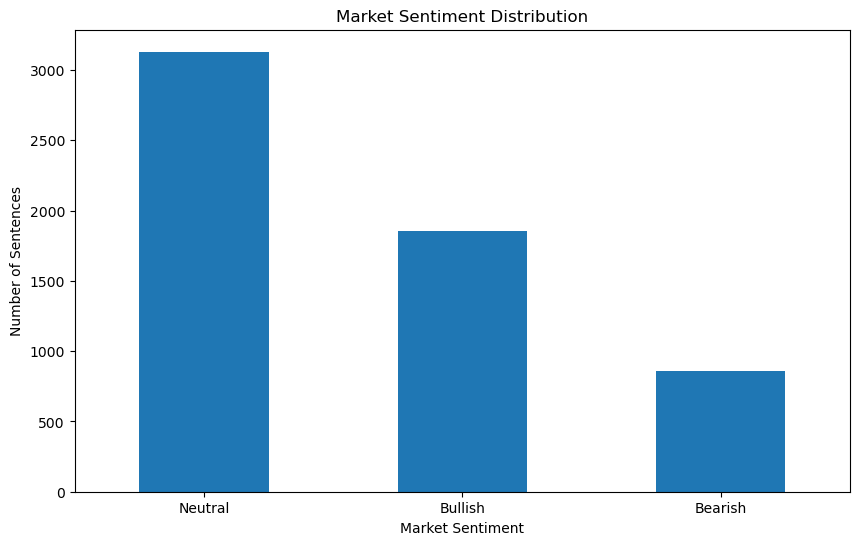

In [56]:
# Calculate the distribution of market sentiments
market_sentiment_distribution = financial_sentiment_data_sorted['Market Sentiment'].value_counts()

# Plot the market sentiment distribution
plt.figure(figsize=(10, 6))
market_sentiment_distribution.plot(kind='bar')
plt.title('Market Sentiment Distribution')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=0)
plt.show()


In [64]:
# Simulate sector data
sectors = ['Technology', 'Finance', 'Healthcare', 'Energy', 'Consumer Goods']
np.random.seed(0)
financial_sentiment_data_sorted['Sector'] = np.random.choice(sectors, size=len(financial_sentiment_data_sorted))

# Calculate sentiment distribution per sector
sector_sentiment_distribution = financial_sentiment_data_sorted.groupby('Sector')['Market Sentiment'].value_counts().unstack().fillna(0)

# Display the first few rows to confirm the assignment
financial_sentiment_data_sorted.head()




,Sentence,Sentiment,Date,Market Sentiment,Sector
2361,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods
3590,Diluted earnings per share ( EPS ) rose to EUR...,positive,2020-01-01,Bullish,Technology
2321,Operating profit before non-recurring items wa...,neutral,2020-01-01,Neutral,Energy
488,Operating profit fell to EUR 15.1 mn from EUR ...,neutral,2020-01-01,Neutral,Energy
5427,$UVXY Put the chum out there at key support th...,negative,2020-01-01,Bearish,Energy


<Figure size 1400x800 with 0 Axes>

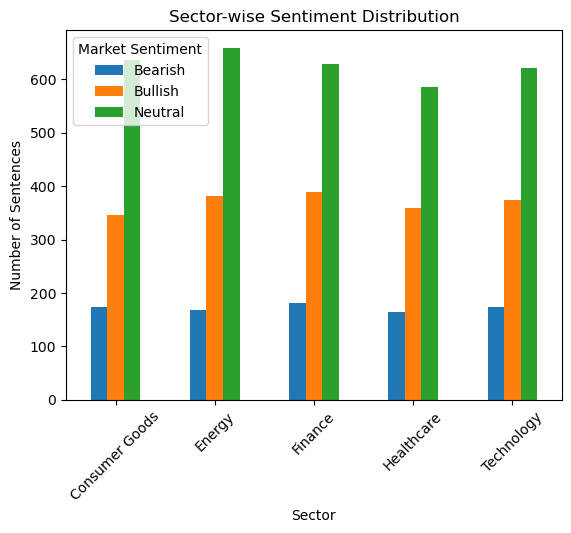

In [92]:
# Plot sentiment distribution for each sector
plt.figure(figsize=(14, 8))
sector_sentiment_distribution.plot(kind='bar')
plt.title('Sector-wise Sentiment Distribution')
plt.xlabel('Sector')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.legend(title='Market Sentiment')
plt.show()


In [70]:
# Simulate stock price data
np.random.seed(0)
dates = pd.date_range('2020-01-01', '2020-12-31')
companies = ['CompanyA', 'CompanyB', 'CompanyC', 'CompanyD', 'CompanyE']
stock_data = pd.DataFrame({
    'Date': np.random.choice(dates, size=len(financial_sentiment_data_sorted)),
    'Company': np.random.choice(companies, size=len(financial_sentiment_data_sorted)),
    'Stock Price': np.random.uniform(100, 500, size=len(financial_sentiment_data_sorted))
})

# Merge sentiment data with stock price data based on date
merged_data = pd.merge(financial_sentiment_data_sorted, stock_data, on='Date', how='inner')

# Display the first few rows to confirm the merge
merged_data.head()


,Sentence,Sentiment,Date,Market Sentiment,Sector,Company,Stock Price
0,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyD,222.826590
1,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyE,350.789498
2,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyE,387.838471
3,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyE,303.598357
4,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyB,457.783690


In [74]:
# Calculate daily stock price change
merged_data['Price Change'] = merged_data.groupby('Company')['Stock Price'].diff()

# Drop rows with NaN values resulting from the diff operation
merged_data = merged_data.dropna(subset=['Price Change'])

# Display the first few rows to confirm the calculation
merged_data.head()


,Sentence,Sentiment,Date,Market Sentiment,Sector,Company,Stock Price,Price Change
2,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyE,387.838471,37.048973
3,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyE,303.598357,-84.240114
7,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyE,225.951388,-77.646969
8,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyD,333.830545,111.003955
9,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,CompanyC,146.091357,-334.715410


In [76]:
# Group data by sentiment and calculate the average price change
average_price_change_by_sentiment = merged_data.groupby('Market Sentiment')['Price Change'].mean()

# Display the results
average_price_change_by_sentiment


Market Sentiment
Bearish   -0.097556
Bullish    0.021330
Neutral    0.008822
Name: Price Change, dtype: float64

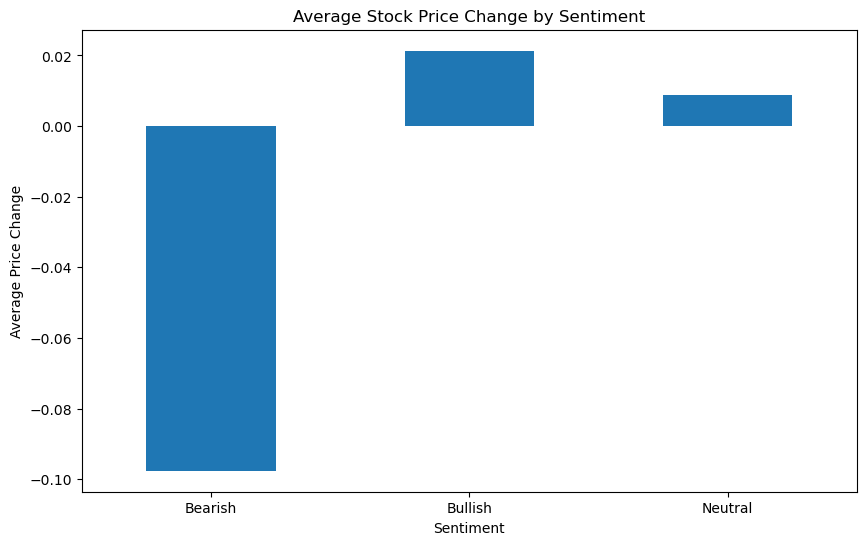

In [78]:
# Plot the average price change by sentiment
plt.figure(figsize=(10, 6))
average_price_change_by_sentiment.plot(kind='bar')
plt.title('Average Stock Price Change by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Price Change')
plt.xticks(rotation=0)
plt.show()


In [80]:
# Simulate geographical region data
regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa']
np.random.seed(0)
financial_sentiment_data_sorted['Region'] = np.random.choice(regions, size=len(financial_sentiment_data_sorted))

# Display the first few rows to confirm the assignment
financial_sentiment_data_sorted.head()


,Sentence,Sentiment,Date,Market Sentiment,Sector,Region
2361,"ADP News - Nov 6 , 2008 - Finnish retail softw...",positive,2020-01-01,Bullish,Consumer Goods,Africa
3590,Diluted earnings per share ( EPS ) rose to EUR...,positive,2020-01-01,Bullish,Technology,North America
2321,Operating profit before non-recurring items wa...,neutral,2020-01-01,Neutral,Energy,South America
488,Operating profit fell to EUR 15.1 mn from EUR ...,neutral,2020-01-01,Neutral,Energy,South America
5427,$UVXY Put the chum out there at key support th...,negative,2020-01-01,Bearish,Energy,South America


In [82]:
# Calculate sentiment distribution per region
regional_sentiment_distribution = financial_sentiment_data_sorted.groupby('Region')['Market Sentiment'].value_counts().unstack().fillna(0)

import ace_tools as tools; tools.display_dataframe_to_user(name="Regional Sentiment Distribution", dataframe=regional_sentiment_distribution)

# Display the sentiment distribution
regional_sentiment_distribution


ModuleNotFoundError: No module named 'ace_tools'

<Figure size 1400x800 with 0 Axes>

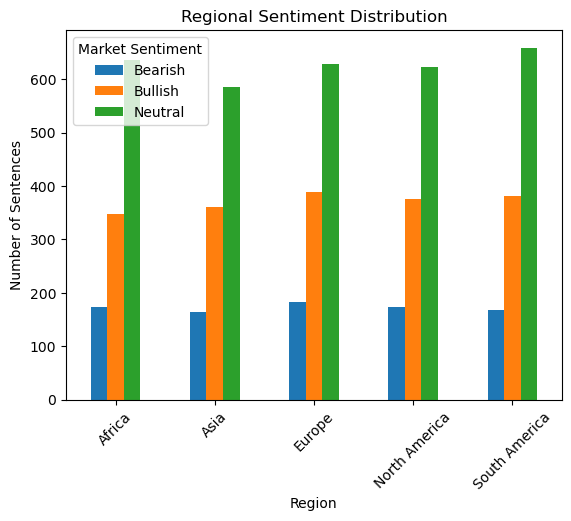

In [90]:
# Plot sentiment distribution for each region
plt.figure(figsize=(14, 8))
regional_sentiment_distribution.plot(kind='bar')
plt.title('Regional Sentiment Distribution')
plt.xlabel('Region')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.legend(title='Market Sentiment')
plt.show()


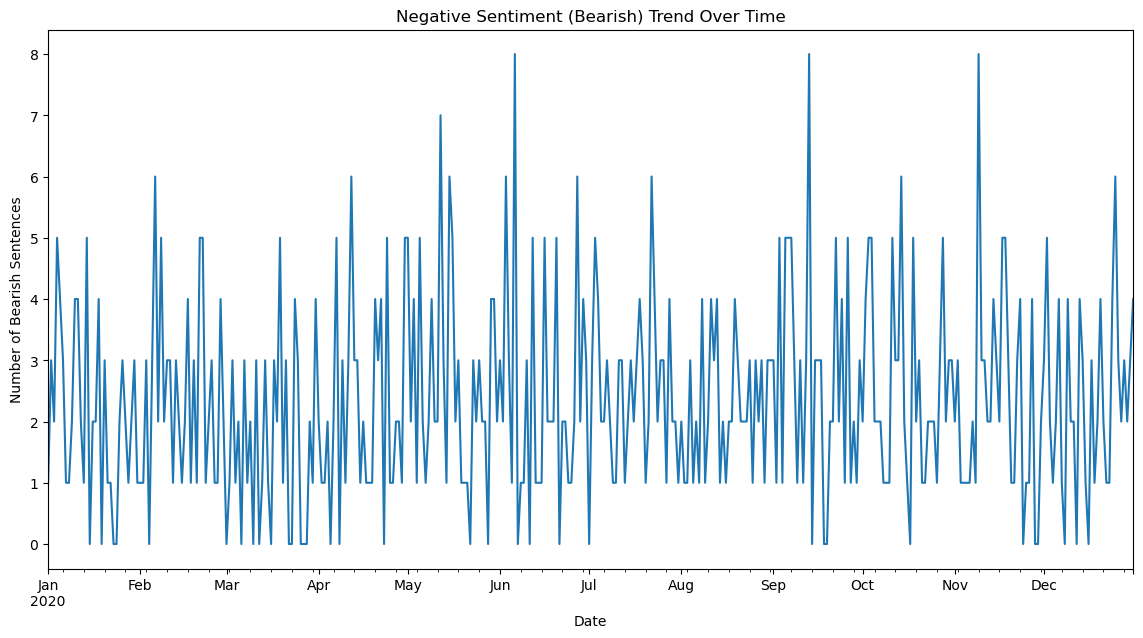

In [86]:
# Group data by date and sentiment to count occurrences
daily_sentiment_counts = financial_sentiment_data_sorted.groupby(['Date', 'Market Sentiment']).size().unstack().fillna(0)

# Calculate the daily negative sentiment (Bearish) trend
negative_sentiment_trend = daily_sentiment_counts['Bearish']

# Plot the negative sentiment trend over time
plt.figure(figsize=(14, 7))
negative_sentiment_trend.plot()
plt.title('Negative Sentiment (Bearish) Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bearish Sentences')
plt.show()


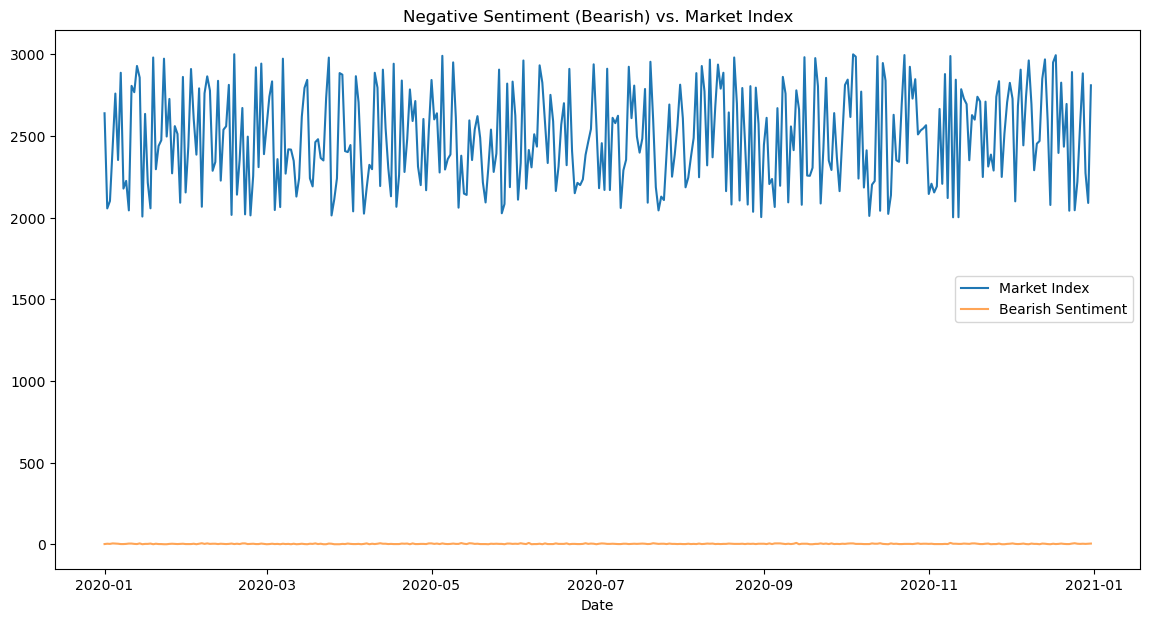

In [88]:
# Simulate market index data
market_index = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', end='2020-12-31'),
    'Market Index': np.random.uniform(2000, 3000, size=366)
})

# Merge with negative sentiment trend data
merged_trend_data = pd.merge(market_index, negative_sentiment_trend.reset_index(), on='Date', how='left').fillna(0)

# Plot negative sentiment trend and market index
plt.figure(figsize=(14, 7))
plt.plot(merged_trend_data['Date'], merged_trend_data['Market Index'], label='Market Index')
plt.plot(merged_trend_data['Date'], merged_trend_data['Bearish'], label='Bearish Sentiment', alpha=0.7)
plt.title('Negative Sentiment (Bearish) vs. Market Index')
plt.xlabel('Date')
plt.legend()
plt.show()
